---
# Linear regression exercises

---
These are introductory exercises in Machine learning with focus in **linear regression** .

<p class = "alert alert-info" role="alert"><b>Note</b> all datasets used in this exercise can be found under Data folder of the course Github repo</p>

<p class = "alert alert-info" role="alert"><b>Note</b> that in cases when you start to repeat code, try not to. Create functions to reuse code instead. </p>

<p class = "alert alert-info" role="alert"><b>Remember</b> to use <b>descriptive variable, function, index </b> and <b> column names</b> in order to get readable code </p>

The number of stars (\*), (\*\*), (\*\*\*) denotes the difficulty level of the task

---

## 0. Simulate phone dataset (*)

We want to simulate data $(x,y)$ to represent cost for phone subscriptions, with: 

- $x$ - called minutes per month
- $y$ - SEK per month 

&nbsp; a) Use ```numpy.random.normal()``` to simulate a dataset with the following requirements:(*)
- set a seed to 42 (for reproducibility and reference)
- simulate 400 x-values from the r.v. $X \sim \mathcal{N}(100, 100)$ 
- take absolute value of these x-values
- simulate noise 400 noise values from r.v. $\epsilon \sim \mathcal{N(0, 50)}$ 
- Let $y = 2x+25+\epsilon$
- plot the data set 

&nbsp; b) Now we want to remove some outliers according to this assumption: (*)
- no one talks more than 300 min using this type of subscription
- no ones costs can be negative
- plot the new dataset
- also plot ground truth using the true parameters $\beta_0 = 25, \beta_1 = 2$

&nbsp; c) Insert the values into a DataFrame (*)

<details>

<summary>Answer</summary>

<img src="../assets/simulated_phone_dataset_0.png" height="200"/>

a) 

Number of points x ≥ 300 min: 8

Number of points y < 0 kr: 6


b)

Length of x, outliers removed 386

Length of y, outliers removed 386

c)

df.head()

|    |   Minutes |     Cost |
|---:|----------:|---------:|
|  0 |   59.4428 | 168.721  |
|  1 |   40.0625 |  98.2118 |
|  2 |  100.524  | 258.433  |
|  3 |  104.698  | 310.548  |
|  4 |   54.9935 | 123.279  |


</details>

---

[Text(0.5, 0, 'called minutes per month'), Text(0, 0.5, 'SEK per month')]

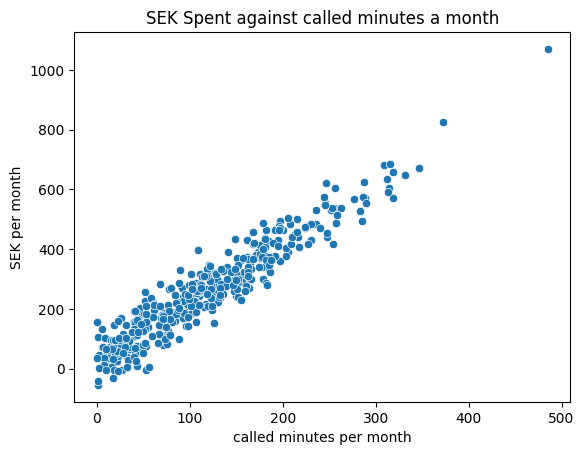

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# question a)

sample  = 400 # Setting a sample of 400
np.random.seed(42) # This enables the random sample to remain the same sample throughout the process

X =np.abs(np.random.normal(loc=100, scale=100,size=sample)) 
# Creating the X variable. using a normal distribution mu= 100 sigma = 100, using the abs to ensure there is no minus numbers in the variable.

e = np.random.normal(loc=0,scale=50, size=sample) # Variable e created 400 noise samples 
y = 2*X + 25 + e # Creating the y variable


ax = sns.scatterplot(x=X, y=y) # creating a scatter plot to visualize the data.
ax.set(title="SEK Spent against called minutes a month") # adding a title to the graph!
ax.set(xlabel="called minutes per month", ylabel="SEK per month")


In [3]:
# question b)


df_phone_sub = pd.DataFrame() # creating a data frame.
df_phone_sub["called minutes per month"] = X #adding column to data frame from the X variable 
df_phone_sub["SEK per month"] = y # adding column to the data frame from the y variable

df_phone_sub = df_phone_sub.loc[df_phone_sub["called minutes per month"] <300]
df_phone_sub = df_phone_sub.loc[df_phone_sub["SEK per month"] >=0]

df_phone_sub["called minutes per month"].max(), df_phone_sub["SEK per month"].min()

(289.6792982653948, 2.706289710169731)

In [4]:
b0 = 25 # intercept
b1 = 2 # inclination

spending = np.linspace(0, 300) # creates the distance of the line to be drawn

ground_truth = lambda x: b0 + b1 * x # This the y hat value gives the points to be plotted


[Text(0.5, 1.0, 'SEK Spent against called minutes a month')]

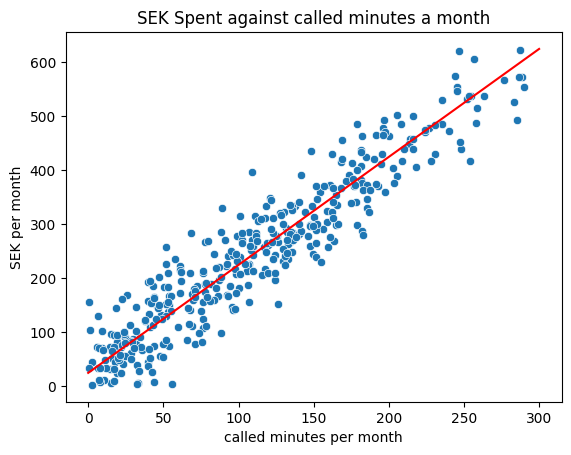

In [5]:
ax = sns.scatterplot(data=df_phone_sub, x="called minutes per month", y="SEK per month")
sns.lineplot(x= spending, y=ground_truth(spending), color="red")
ax.set(title="SEK Spent against called minutes a month") # adding a title to the graph!

In [6]:
df_phone_sub.head()

,called minutes per month,SEK per month
0,149.671415,244.621448
1,86.173570,167.378389
2,164.768854,354.799893
3,252.302986,531.955001
4,76.584663,155.666051


## 1. Train|test split (*)

Before moving on with linear regression we shall first perform a train-test-split. 

&nbsp; a) Create a train-test-split function with the following call signature: (*)

```py
def train_test_split(X: pd.DataFrame, y: pd.DataFrame, train_fraction=.7: float, random_state=42: int, replace=False: bool) -> tuple
```

that returns the tuple:
```
(X_train, X_test, y_train, y_test)
```

&nbsp; b) Now use this to split up your data into a training set and test set. Check manually that the split is performed correctly. (*)


<details>

<summary>Hint</summary>

b) Check the length of each set, and check the indices of the sorted sets that they don't overlap and are not missing. Also check that they sum up to what you expect.

</details>

<br/>

<details>

<summary>Answer</summary>

Using default 0.7: 
- length of X_train: 270
- length of X_test: 116
- length of y_train: 270
- length of X_test: 116

</details>

---

In [7]:
# kanske fel?

def train_test_split(X , y , train_fraction=.7, random_state=42, replace=False) -> tuple:
    n_X = int(len(X)*train_fraction)
    X_train = X.sample(n=n_X, random_state=random_state,replace=replace )
    X_test = X.drop(X_train.index)

    n_y = int(len(y)*train_fraction)
    y_train = y.sample(n=n_y,random_state=random_state, replace=replace)
    y_test = y.drop(y_train.index)
    

    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = train_test_split(df_phone_sub["SEK per month"],df_phone_sub["called minutes per month"])

print(f"This is X_train and X_test {X_train.shape, X_test.shape}")
print(f"This is y_train and y_test {y_train.shape, y_test.shape}")
print(f"The sum of X_train and X_test is {np.add(X_train.shape, X_test.shape)}")
print(f"The sum of y_train and y_test is {np.add(y_train.shape, y_test.shape)}")

This is X_train and X_test ((266,), (115,))
This is y_train and y_test ((266,), (115,))
The sum of X_train and X_test is [381]
The sum of y_train and y_test is [381]


In [8]:
from sklearn.model_selection import train_test_split # using sklearn as could be potential problem with my function

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) #doing a 70% 30% split 
X_train = X_train.reshape(-1,1) # shapes the array so it can be multiplied
X_test = X_test.reshape(-1,1) 
y_train = y_train.reshape(-1,1) # shapes the array so it can be multiplied with the matrix
y_test= y_test.reshape(-1,1)


X_train.shape, X_test.shape, y_train.shape, y_test.shape

((280, 1), (120, 1), (280, 1), (120, 1))

## 2. Simple linear regression with normal equation (*)

Use the normal equation for simple linear regression to solve for the coefficients $\hat{\beta} = (\beta_0, \beta_1)$. Note that you should only use the training data to fit the regression line, and not data from the test set. Plot the the regression line, together with ground truth and training data. 

<details>

<summary>Hint</summary>

It is important to keep track of the shapes of the vectors, matrices in order for matrix multiplication matmul "@" to work correctly. Also, if you have series object, you need to convert it to numpy. 

</details>

<br/>

<details>

<summary>Answer</summary>


<img src="../assets/Reg_line_normal_eq.png" height="200"/>

</details>

---

In [9]:
X_train = np.c_[np.ones(len(X_train)), X_train] # This adds ones to the array for multiplication
X_test = np.c_[np.ones(len(X_test)), X_test]
type(X_train)

numpy.ndarray

In [10]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((280, 2), (120, 2), (280, 1), (120, 1))

In [11]:

regression_fit = lambda X, y: np.linalg.inv(X.T@X)@X.T@y # This is the normal equation to get the beta hat
beta_hat = regression_fit(X_train, y_train) # unpacking the tuple to a variable and inserting the x and y values

beta_hat


array([[27.34481509],
       [ 1.95324624]])

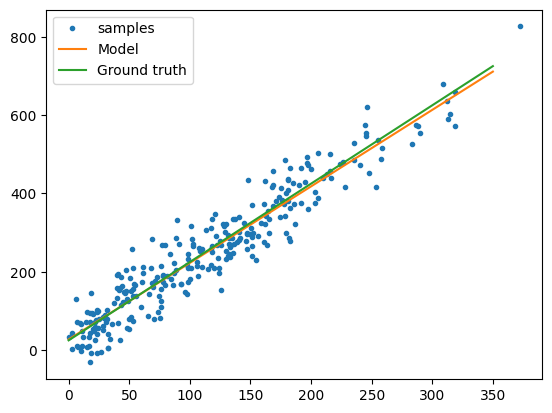

In [37]:
plt.plot(X_train[:,1], y_train, '.', label = "samples") # plotting X and y train, X train has the 1's eliminated


x = np.linspace(0,350) # Setting the length of the regression lines as x
y_model = beta_hat[0] + beta_hat[1]*x # This is the linear regression
plt.plot(x, y_model, label = "Model") # plotting the linear regression line
plt.plot(x, ground_truth(x), label = "Ground truth") # plotting the ground truth line
plt.legend() # setting a legend

## 3. Prediction and evaluation (*)

&nbsp; a) Use your model to make prediction on testing data. Plot the prediction cost against X_test, and y_test against X_test. (*)

&nbsp; b) Calculate MAE, MSE, RMSE (*)

<details>

<summary>Hint</summary>

Calculate y_pred from X_test and use y_test and y_pred to compute different evaluation metrics.

Careful with dimensions when computing the evaluation metrics, else it can be catastrophical logical errors due to numpy broadcasting feature.

Note that after you have calculate the error metrics on test data you are not allowed to change any parameters to make the line fit better to the testing data.

</details>

<br/>

<details>

<summary>Answer</summary>

a) 

<img src="../assets/eval_simple_lin_reg.png" height="200"/>

b)

Mean absolute error on testing data: 36.97 kr

Mean squared error on testing data: 2374 kr^2

Root mean squared error on testing data: 48.72 kr

</details>

---

In [32]:
predict = lambda X, weights: X @ weights

#beta_hat = np.reshape(beta_hat.to_numpy())

y_pred = np.concatenate(predict(X_test, beta_hat))


y_pred.shape

(120,)

In [26]:
X_test.size
X_test.shape
X_test[:, 1].shape # choose all rows, column with index 1
y_test.

(120,)

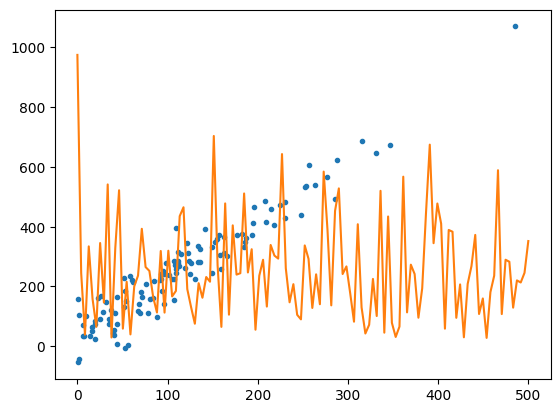

In [36]:
x_ax = np.linspace(0,500, 120)

plt.plot(X_test[:,1], y_test, '.', label = "samples") 


plt.plot(x_ax, y_pred, label = "Prediction") # plotting the linear regression line

In [ ]:
y_pred